In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2022_Car_Data_Cleaned.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [3]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

In [4]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [5]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

### Numerical Data

In [6]:
# correlation between numerical data
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244677,...,-0.022579,-0.195736,0.027956,-0.078346,-0.118214,-0.099157,0.121454,-0.121454,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,...,0.075790,0.279719,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,...,0.217300,0.239544,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,...,0.371250,-0.360233,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,...,0.579731,-0.286035,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,...,0.615006,-0.245852,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,...,-0.086941,-0.309913,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,...,0.757994,-0.279350,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,...,0.822649,-0.256753,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,0.244677,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,...,0.566838,-0.267338,-0.582121,0.559197,0.543154,0.554726,0.054435,-0.054435,-0.227782,0.227782


In [7]:
# correlation between specific columns
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566838
stroke,-0.055390,1.000000,0.187854,0.097815
compression-ratio,0.001250,0.187854,1.000000,-0.214431
horsepower,0.566838,0.097815,-0.214431,1.000000


In [8]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 53269.93420327317)

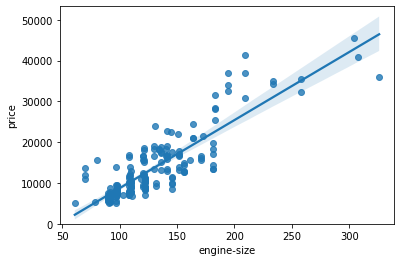

In [9]:
# Regplot to see relation between continous variables
sns.regplot(x='engine-size',y='price', data = df)
plt.ylim(0,)

In [10]:
df[['highway-L/100km','price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


(0.0, 47719.95866891887)

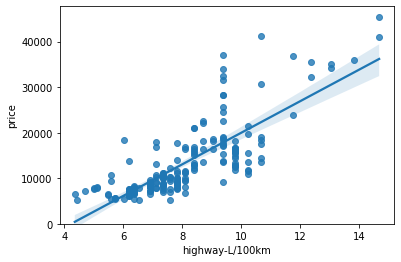

In [11]:
sns.regplot(x= 'highway-L/100km',y='price', data = df)
plt.ylim(0,)

In [12]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


(0.0, 47414.1)

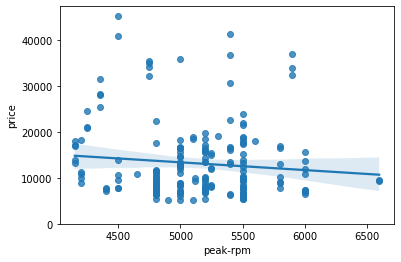

In [13]:
sns.regplot(x='peak-rpm',y='price', data = df)
plt.ylim(0,)

In [14]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


(0.0, 47414.1)

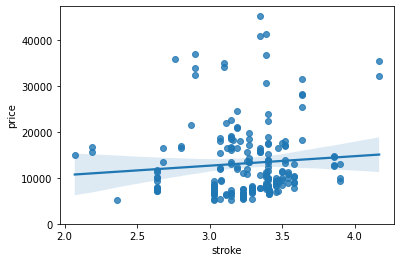

In [15]:
sns.regplot(x='stroke',y='price', data = df)
plt.ylim(0,)

In [16]:
df[['bore','price']].corr()

,bore,price
bore,1.000000,0.543154
price,0.543154,1.000000


(0.0, 47792.404330003716)

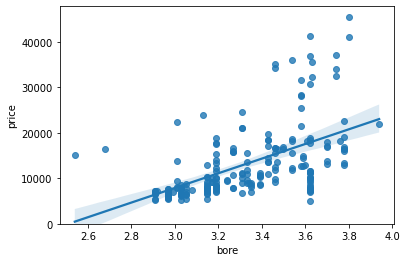

In [17]:
sns.regplot(x='bore',y='price', data = df)
plt.ylim(0,)

### Categorical Data

<AxesSubplot: xlabel='body-style', ylabel='price'>

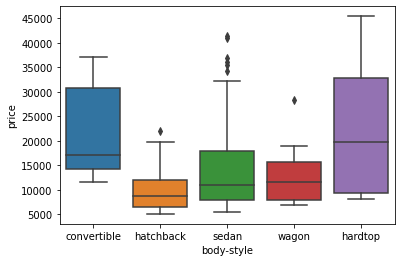

In [18]:
#box  plots
sns.boxplot(x='body-style',y='price',data = df)

<AxesSubplot: xlabel='engine-location', ylabel='price'>

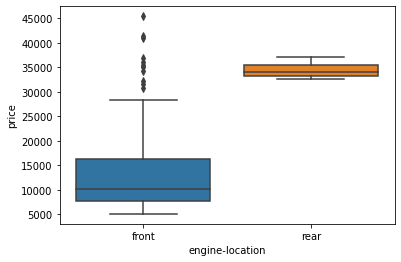

In [19]:
sns.boxplot(x='engine-location',y='price',data = df)

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

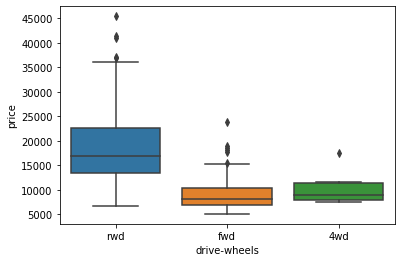

In [20]:
sns.boxplot(x='drive-wheels',y='price',data = df)

<AxesSubplot: xlabel='num-of-cylinders', ylabel='price'>

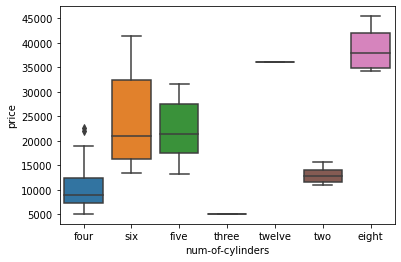

In [21]:
sns.boxplot(x='num-of-cylinders',y='price',data = df)

In [22]:
df['num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

### Descriptive Statistical Analysis

In [23]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,...,103.396985,5117.587940,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,37.365602,478.113178,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,95.000000,5117.587940,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [24]:
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [25]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [26]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns = {'drive-wheels':'value_counts'}, inplace = True)
drive_wheel_counts.index.name = 'drive-wheel-type'
drive_wheel_counts

,value_counts
drive-wheel-type,
fwd,118
rwd,75
4wd,8


In [27]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


### Grouping 

In [28]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [30]:
df_group_1 = df[['drive-wheels','body-style','price']].groupby(['drive-wheels'], as_index = False).mean()
df_group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [31]:
df_group_2 = df[['drive-wheels','body-style','price']].groupby(['body-style'], as_index = False).mean()
df_group_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [32]:
df_group_3 = df[['drive-wheels','body-style','price']].groupby(['body-style','drive-wheels'], as_index = False).mean()
df_group_3

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [33]:
# grouped pivot
df_pivot_3 = df_group_3.pivot(index= 'drive-wheels', columns = 'body-style')
df_pivot_3

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

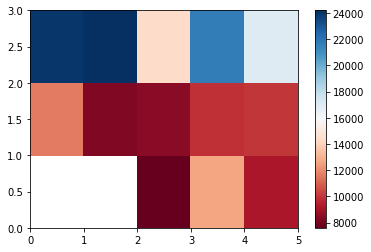

In [34]:
# heat map
plt.pcolor(df_pivot_3, cmap= 'RdBu')
plt.colorbar()
plt.show()

In [35]:
df_pivot_3.shape[1]

5

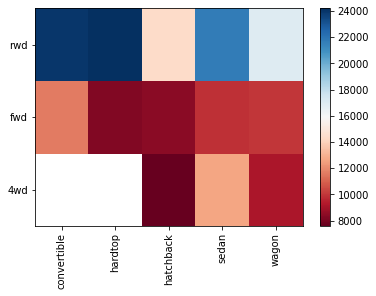

In [36]:
# heat map with proper annotations
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot_3, cmap = 'RdBu')

row_labels = df_pivot_3.columns.levels[1]
col_labels =  df_pivot_3.index

ax.set_xticks(np.arange(df_pivot_3.shape[1]) + 0.5,minor =False)
ax.set_yticks(np.arange(df_pivot_3.shape[0]) + 0.5,minor = False)

ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()


## Correlation and Causation

In [37]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244677,...,-0.022579,-0.195736,0.027956,-0.078346,-0.118214,-0.099157,0.121454,-0.121454,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,...,0.075790,0.279719,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,...,0.217300,0.239544,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,...,0.371250,-0.360233,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,...,0.579731,-0.286035,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,...,0.615006,-0.245852,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,...,-0.086941,-0.309913,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,...,0.757994,-0.279350,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,...,0.822649,-0.256753,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,0.244677,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,...,0.566838,-0.267338,-0.582121,0.559197,0.543154,0.554726,0.054435,-0.054435,-0.227782,0.227782


In [38]:
from scipy import stats

In [39]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

In [40]:
print(pearson_coef)
print(p_value)

0.584641822265508
8.076488270733218e-20


In [41]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])

In [42]:
print(pearson_coef)
print(p_value)

0.8096811975632288
6.058444649710002e-48


In [43]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])

In [44]:
print(pearson_coef)
print(p_value)

0.6906283804483638
8.016477466159556e-30


### ANOVA   Analysis of Variance

In [45]:
df_temp = df[['drive-wheels','body-style','price']]

In [46]:
df_temp2  = df_temp[['drive-wheels','price']]

In [47]:
df_temp2

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


In [48]:
df_group = df_temp2.groupby(['drive-wheels'])

In [49]:
df_temp2.groupby(['drive-wheels']).mean()

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [50]:
df_temp2.groupby(['drive-wheels']).get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [51]:
anova_test  = df_temp2.groupby(['drive-wheels'])

In [52]:
f_val, p_val = stats.f_oneway(anova_test.get_group('fwd')['price'], anova_test.get_group('rwd')['price'], anova_test.get_group('4wd')['price'])   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [53]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(anova_test.get_group('4wd')['price'], anova_test.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [54]:
# fwd and rwd
f_val, p_val = stats.f_oneway(anova_test.get_group('fwd')['price'], anova_test.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [55]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(anova_test.get_group('4wd')['price'], anova_test.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Thank You